In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Practicing with Joint Probability Mass Functions

## Joint probability mass function of two discrete random variables

Consider two discrete random variables, $X$ and $Y$.
Say that $X$ takes $5$ values, $0,1,\dots,4$, and $Y$ takes $10$ values, $0,1,\dots,9$.
Then, you can think of the joint probability mass function of $X$ and $Y$ as the $5\times 10$ matrix:

$$
A_{ij} = p(X=i, Y=j).
$$

Let's make up such a matrix to play with:

In [4]:
import numpy as np
# This is to make sure that we all get the same results
np.random.seed(12345)
# First I draw a matrix with random entries in [0,1]
A = np.random.rand(5, 10)
print(A)

[[0.92961609 0.31637555 0.18391881 0.20456028 0.56772503 0.5955447
  0.96451452 0.6531771  0.74890664 0.65356987]
 [0.74771481 0.96130674 0.0083883  0.10644438 0.29870371 0.65641118
  0.80981255 0.87217591 0.9646476  0.72368535]
 [0.64247533 0.71745362 0.46759901 0.32558468 0.43964461 0.72968908
  0.99401459 0.67687371 0.79082252 0.17091426]
 [0.02684928 0.80037024 0.90372254 0.02467621 0.49174732 0.52625517
  0.59636601 0.05195755 0.89508953 0.72826618]
 [0.81835001 0.50022275 0.81018941 0.09596853 0.21895004 0.25871906
  0.46810575 0.4593732  0.70950978 0.17805301]]


In [5]:
# And then I scale it so that the sum of all elements is one:
A = A / np.sum(A)
print(f"A = {A}")
print(f"Sum of A_ij = {np.sum(A):.2f}")

A = [[0.03382266 0.01151084 0.0066916  0.00744261 0.0206558  0.02166798
  0.03509238 0.02376485 0.02724782 0.02377914]
 [0.02720446 0.03497567 0.0003052  0.00387282 0.01086788 0.02388251
  0.02946379 0.03173278 0.03509722 0.02633018]
 [0.02337548 0.02610345 0.01701287 0.0118459  0.01599579 0.02654862
  0.0361657  0.02462701 0.02877286 0.00621845]
 [0.00097687 0.02912024 0.03288056 0.00089781 0.01789147 0.01914699
  0.02169786 0.0018904  0.03256646 0.02649685]
 [0.02977441 0.01819984 0.0294775  0.00349167 0.00796616 0.0094131
  0.01703131 0.01671359 0.02581442 0.00647819]]
Sum of A_ij = 1.00


Now we have a matrix that corresponds to a proper joint probability mass function.

Let's start by extracting the probability mass function of $X$ from the joint probability mass function of $X$ and $Y$.
Remember that you need to marginalize:

$$
p(x) = \sum_{y} p(x,y) = \sum_{y} A_{xy}.
$$

This is easy:

In [6]:
p_x = np.sum(A, axis=1) # Axis = 1 tells sum to sum only the second axis
print(f"pmf of just X: {p_x}")

pmf of just X: [0.21167568 0.2237325  0.21666614 0.1835655  0.16436018]


Verify that this is indeed a pmf:

In [7]:
print(f"sum of p_x = {np.sum(p_x):.2f}")

sum of p_x = 1.00


With this you can easily find the expectation of $X$:

In [8]:
E_X = np.sum(np.arange(5) * p_x)
print(f"E[X] = {E_X:.2f}")

E[X] = 1.87


Similarly for the variance of $X$:

In [9]:
E_X2 = np.sum(np.arange(5) ** 2 * p_x)
V_X = E_X2 - E_X ** 2
print(f"V[X] = {V_X:.2f}")

V[X] = 1.89


Let's do the same for $Y$:

In [10]:
p_y = np.sum(A, axis=0)
print(f"pmf of just Y: {p_y}")
E_Y = np.sum(np.arange(10) * p_y)
print(f"E[Y] = {E_Y:.2f}")
E_Y2 = np.sum(np.arange(10) ** 2 * p_y)
V_Y = E_Y2 - E_Y ** 2
print(f"V[Y] = {V_Y:.2f}")

pmf of just Y: [0.11515387 0.11991004 0.08636773 0.0275508  0.07337711 0.1006592
 0.13945104 0.09872863 0.14949879 0.0893028 ]
E[Y] = 4.70
V[Y] = 8.98


Alright, we have found all the individual statistics.
Let's now find the covariance of the two random variables.
Remember the formula:

$$
\mathbb{C}[X,Y] = \sum_{x,y} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])p(x,y).
$$

Here we go:

In [11]:
# We will loop over all the possible values
C_XY = 0.0 # Keeping track of the sum
for x in range(5):
    for y in range(10):
        C_XY += (x - E_X) * (y - E_Y) * A[x, y] # the += means add to the left hand side
print(f"C[X, Y] = {C_XY:.2f}")

C[X, Y] = -0.38


Remember that the covariance depends on the units of the random variables. Let's find the correlation coefficient:

In [12]:
rho_XY = C_XY / (np.sqrt(V_X) * np.sqrt(V_Y))
print(f"rho_XY = {rho_XY:.2f}")

rho_XY = -0.09


We see that $X$ and $Y$ are slightly negatively correlated.
How can we visualize this?
We need to sample from the joint distribution of $X$ and $Y$.
We can do this by sampling a tuple of indices $(i,j)$ with probability $A_{ij}$.
This is like sampling from a categorical with $5\times 10 = 50$ different labels $c_0 = (1,1), c_1 = (1,2), \dots, c_{49} = (5, 10)$ each with a probability $A_{00}, A_{01}, \dots, A_{4,9}$.

This is what the code below does. You can look at the details, if you are so inclined.

In [13]:
import scipy.stats as st

# A.flatten() is the matrix flattened out as a row
XY = st.rv_discrete('Joinnt XY', values=(range(50), A.flatten()))

# Let's now write a function that samples X and Y using a sample from XY
def sample_X_and_Y():
    """Samples X and Y once."""
    k = XY.rvs()
    # This is integer division
    i = k // 10
    # This is the remainder
    j = k % 10
    return i, j

Let's try it out - take 10 samples:

In [14]:
for n in range(10):
    x, y = sample_X_and_Y()
    print(f"x = {x:d}, y = {y:d}")

x = 2, y = 5
x = 0, y = 8
x = 3, y = 6
x = 4, y = 5
x = 2, y = 7
x = 0, y = 7
x = 2, y = 2
x = 1, y = 8
x = 4, y = 0
x = 4, y = 2


Let's take many more samples and do a scatter plot:
```python

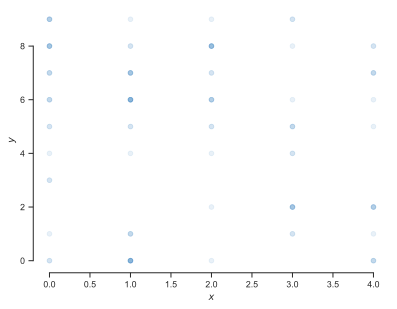

In [17]:
samples = np.array([sample_X_and_Y() for _ in range(100)])
xs = samples[:,0]
ys = samples[:,1]
plt.scatter(xs, ys, alpha=0.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
sns.despine(trim=True)


You can sort of see the negative correlation.
We will see more concrete patterns when we work with continuous random variables.

Now, let's write some code to find the expectation of a function $g(X, Y) = X + Y$.
It is:

$$
\mathbb{E}[f(X,Y)] = \sum_{x,y}g(x,y) p(x,y) = \sum_{x,y}g(x,y)A_{xy}. 
$$

Let's write a function that calculates the expectation of any $f$ and then use it for $g(X,Y) = X + Y$.

In [22]:
def expectation(g, A):
    """Returns the expectation of the function f(X, Y).
    
    Arguments:
    g -- A function g(X, Y).
    A -- A matrix containing the joint probability mass
         function of X and Y. Say that A has dimensions
         n x m. We assume that X takes values
         0, 1, ..., n-1 and that Y takes values
         0, 1, ..., m-1.
    """
    n, m = A.shape
    res = 0.
    for i in range(n):
        for j in range(m):
            res += g(i, j) * A[i, j]
    return res

Notice that `expectation` is a Python function that takes as an input the Python function of which we want to find the expectation.
This is cool!
It is called a higher-order function or a meta-function.

Here is how to use `expectation`.
First, you need to define the function the expectation of which you want to find.

In [23]:
def g(x, y):
    return x + y

We can calculate the expectation like this:

In [24]:
E_g = expectation(g, A)

print(f"E[g(X, Y)] = {E_g:.2f}")

E[g(X, Y)] = 6.56


For the particular case $g(x,y) = x + y$, we also know that

$$
\mathbb{E}[X+Y] = \mathbb{E}[X] + \mathbb{E}[Y].
$$

Let's test this:

In [25]:
print(f"E[X] + E[Y] = {E_X + E_Y:.2f}")

E[X] + E[Y] = 6.56


Cool! It's the same!

Now let's find the variance of $g(X, Y)$.
We can use the formula:

$$
\mathbb{V}[g(X,Y)] = \mathbb{E}\left[g^2(X,Y)\right] - \left\{\mathbb{E}[g(X,Y)]\right\}^2.
$$

We need to define a function that corresponds to the square of $g(X,Y)$.
Here it is:

In [26]:
def f(x, y):
    return g(x, y) ** 2

So, now we can do:

In [27]:
V_g = expectation(f, A) - E_g ** 2

print(f"V[g(X, Y)] = {V_g:.2f}")

V[g(X, Y)] = 10.11


## Questions

+ Change the random seed to another number (try a few different ones) and re-run the code above. What happens to the corelation coefficient? How does the scatter plot change?
+ Write code to find the expectation of $3X + 5Y$.

In [ ]:
# Your code here

+ Write code to find the variance of $3X + 5Y$.

In [28]:
# Your code here

+ Write code that finds the expectation and variance of the function $h(X,Y) = XY^3$.

In [17]:
# Your code here

### If you are feeling bored, learn some functional programming...

I have to show you a neat way to do this using functional programming ideas.
Functional programming is a programming paradigm that is very different from the imperative programming that we have been doing so far.
It is a very powerful paradigm, and it is the basis of many modern programming languages.
Examples of such languages are Haskell, Scala, and Clojure.
Python is not a functional programming language, but it has some functional programming features.
Feel free to skip if you find it wierd...
It is not required for the rest of the course.

First, here is how you can define a function super-quickly in Python:

In [29]:
f = lambda x, y: x + y

This is called a lambda expression. It is a way to define a function in one line.

Now, I am going to define a function that squares any function.
Pay attention, I will define a function that takes as an argument any function (with any arguments) and it returns another function which is just the square of the first.
Here it is in one line:

In [31]:
square = lambda f: lambda *args: f(*args) ** 2

Here is what I can do with this:

In [32]:
f2 = square(f)

print(f"f(1,2) = {f(1,2)}, f(1, 3) ** 2 = {f2(1,2)}")

f(1,2) = 3, f(1, 3) ** 2 = 9


So, now can find the variance like this:

In [33]:
V_f = expectation(square(f), A) - expectation(f, A) ** 2

print(f"V[f(X, Y)] = {V_f:.2f}")

V[f(X, Y)] = 10.11


We can even write another function that finds the variance of any function. Here is how:

In [34]:
variance = lambda f: expectation(square(f), A) - expectation(f, A)**2

Now we can simply do:

In [35]:
print(f"V[f(X, Y)] = {variance(f):.2f}")

V[f(X, Y)] = 10.11


Neat, right?

### Functional programming resources
+ If you want to learn more about functional programming in Python, check out [this tutorial](https://realpython.com/python-first-class-functions/).
+ If you want to learn more about the `lambda` keyword, check out [this tutorial](https://realpython.com/python-lambda/).
+ You can also learn a little Haskell [here](http://learnyouahaskell.com/).
+ Or if you want, your can go and learn some Lisp using the freely available masterpiece [Structure and Interpretation of Computer Programs](https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book.html). The language used in the book is Scheme, which is hardly used. But your brain will thank you after reading the book. You will be a better programmer.
